In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/My Drive'

/content/drive/My Drive


In [4]:
!pip install SimpleITK

     |████████████████████████████████| 44.9MB 94kB/s 


In [5]:
import os
import pandas as pd
import numpy as np
import six, numpy as np    
import SimpleITK as sitk

In [6]:
import os
import SimpleITK as sitk
image_1 = sitk.ReadImage('/content/drive/MyDrive/resources/mni_t1_template.nii.gz')
label_1 = sitk.ReadImage('/content/drive/MyDrive/resources/mni_brain_mask.nii.gz')
image_2 = sitk.ReadImage('/content/drive/MyDrive/resources/mni_t2_template.nii.gz')
label_2 = sitk.ReadImage('/content/drive/MyDrive/resources/mni_brain_mask.nii.gz')

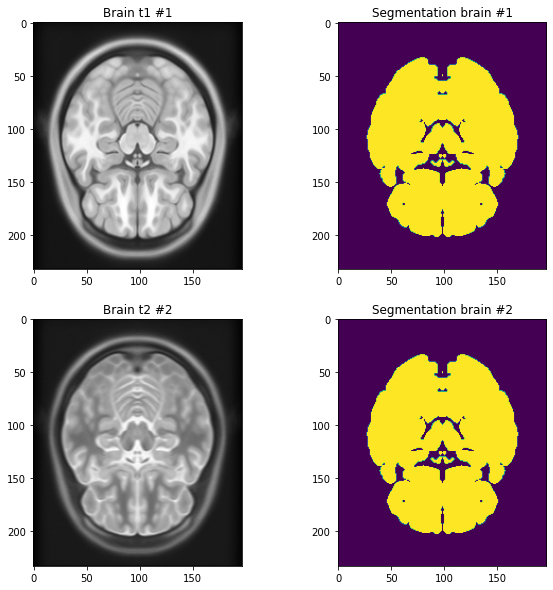

In [7]:
# Display the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
# First image
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(image_1)[55,:,:], cmap="gray")
plt.title("Brain t1 #1")
plt.subplot(2,2,2)
plt.imshow(sitk.GetArrayFromImage(label_1)[55,:,:])        
plt.title("Segmentation brain #1")

# Second image
plt.subplot(2,2,3)
plt.imshow(sitk.GetArrayFromImage(image_2)[55,:,:], cmap="gray")        
plt.title("Brain t2 #2")

plt.subplot(2,2,4)
plt.imshow(sitk.GetArrayFromImage(label_2)[55,:,:])        
plt.title("Segmentation brain #2")

plt.show()

In [12]:
structural_datat1=sitk.GetArrayFromImage(image_1)
structural_datat2=sitk.GetArrayFromImage(image_2)

In [23]:
structural_datat1.shape

(189, 233, 197)

In [25]:
structural_datat2.shape

(189, 233, 197)

In [21]:
import numpy
t1brain=numpy.swapaxes(structural_datat1,2,0)
t1brain.shape

(197, 233, 189)

In [24]:
import numpy
t2brain=numpy.swapaxes(structural_datat2,2,0)
t2brain.shape

(197, 233, 189)

In [29]:
import ipywidgets as widgets
@widgets.interact(slice=widgets.IntSlider(min=0, max=188, step=1, value=0))
def plot_struct(slice):
    fig, ax = plt.subplots(1, 1, figsize=[10,10])
    ax.imshow(t1brain[:,:,slice],'gray')
    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

interactive(children=(IntSlider(value=0, description='slice', max=188), Output()), _dom_classes=('widget-inter…

In [30]:
import ipywidgets as widgets
@widgets.interact(slice=widgets.IntSlider(min=0, max=188, step=1, value=0))
def plot_struct(slice):
    fig, ax = plt.subplots(1, 1, figsize=[10,10])
    ax.imshow(t2brain[:,:,slice],'gray')
    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

interactive(children=(IntSlider(value=0, description='slice', max=188), Output()), _dom_classes=('widget-inter…

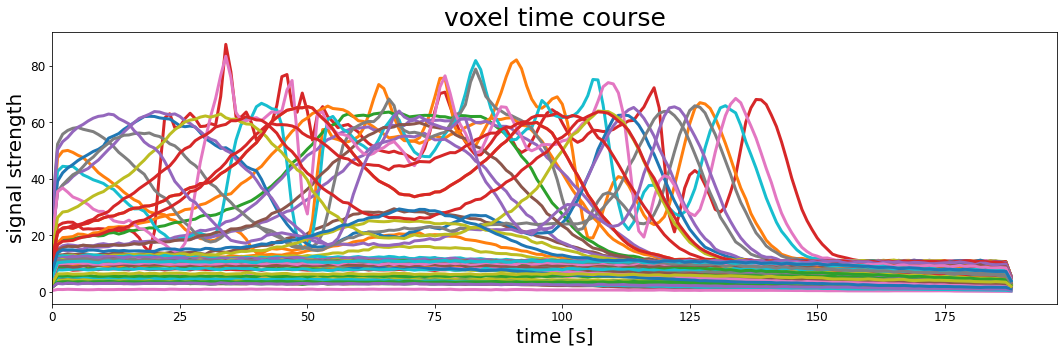

In [33]:
# Create an empty plot with defined aspect ratio
fig, ax = plt.subplots(1, 1, figsize=[18, 5])

# voxel indices for one voxel
x_coord = 30
y_coord = 30

# Plot the timecourse of a random voxel from the transveral array
ax.plot(t2brain[x_coord, y_coord, :], lw=3)

# choose some more voxels at random  and plot 100 more voxel timecourses
# COMPREHENSION CHECK: why do we choose a random index value between 0 and 64? Why not 0 and 100?
n_voxels_to_plot=100
for _ in range(0, n_voxels_to_plot):
    x_coord = np.random.randint(64)
    y_coord = np.random.randint(64)
    ax.plot(t2brain[x_coord, y_coord, :], lw=3)

ax.set_xlim([0, t2brain.shape[0]])
ax.set_xlabel('time [s]', fontsize=20)
ax.set_ylabel('signal strength', fontsize=20)
ax.set_title('voxel time course', fontsize=25)
ax.tick_params(labelsize=12)

plt.show()

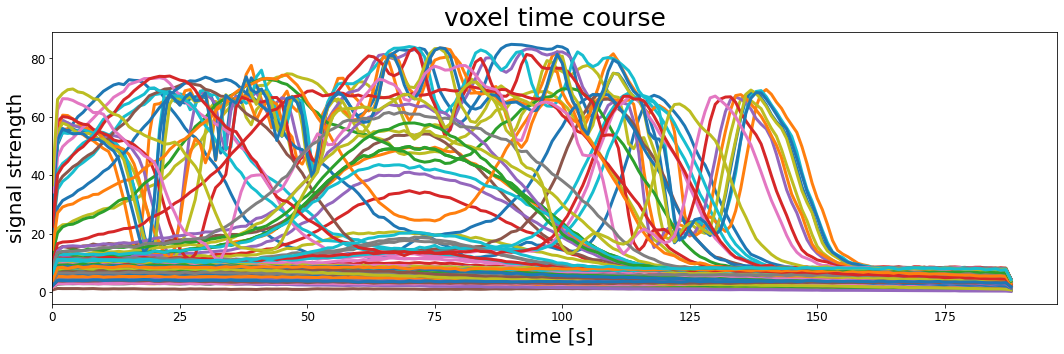

In [34]:
# Create an empty plot with defined aspect ratio
fig, ax = plt.subplots(1, 1, figsize=[18, 5])

# voxel indices for one voxel
x_coord = 30
y_coord = 30

# Plot the timecourse of a random voxel from the transveral array
ax.plot(t1brain[x_coord, y_coord, :], lw=3)

# choose some more voxels at random  and plot 100 more voxel timecourses
# COMPREHENSION CHECK: why do we choose a random index value between 0 and 64? Why not 0 and 100?
n_voxels_to_plot=100
for _ in range(0, n_voxels_to_plot):
    x_coord = np.random.randint(64)
    y_coord = np.random.randint(64)
    ax.plot(t1brain[x_coord, y_coord, :], lw=3)

ax.set_xlim([0, t1brain.shape[0]])
ax.set_xlabel('time [s]', fontsize=20)
ax.set_ylabel('signal strength', fontsize=20)
ax.set_title('voxel time course', fontsize=25)
ax.tick_params(labelsize=12)

plt.show()

In [36]:
x_coord = 30
y_coord = 30

# get all of the values over time for a single voxel
voxel_1_tc = t1brain[x_coord, y_coord, :]

In [37]:
x_coord = 36
y_coord = 36
# get all of the values over time for a single voxel
voxel_2_tc = t2brain[x_coord, y_coord, :]

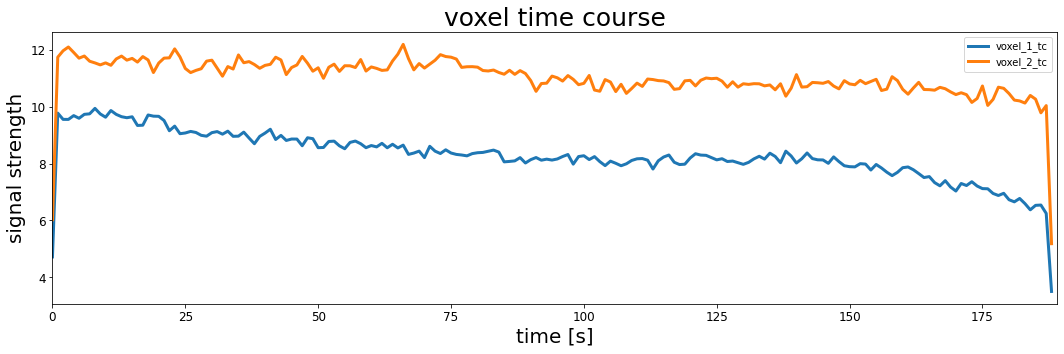

In [38]:
# example for plotting two timeseries on the same plot

# Create an empty plot with defined aspect ratio
# ax is the 'handle' for the plot and we use it to tell python where to put the data we're plotting
fig, ax = plt.subplots(1, 1, figsize=[18, 5])


# You'll need to get the timeseries of activation for two voxels and put them in these two variables:
voxel_1_tc = voxel_1_tc
voxel_2_tc = voxel_2_tc

# Plot the timecourse of each voxel to the current axes
ax.plot(voxel_1_tc, lw=3, label='voxel_1_tc')
ax.plot(voxel_2_tc, lw=3, label='voxel_2_tc')

ax.set_xlim([0, voxel_1_tc.shape[0]])
ax.set_xlabel('time [s]', fontsize=20)
ax.set_ylabel('signal strength', fontsize=20)
ax.set_title('voxel time course', fontsize=25)
ax.tick_params(labelsize=12)
ax.legend()

plt.show()

In [39]:
# statistical test on two voxel values over z diemnsion
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
# seed the random number generator
seed(1)
# generate two independent samples
data1 = voxel_1_tc
data2 = voxel_2_tc
# compare samples
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=-33.081, p=0.000
Different distributions (reject H0)


In [40]:
#Paired Student’s t-Test
# Paired Student's t-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_rel
# seed the random number generator
seed(1)
# compare samples
stat, p = ttest_rel(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=-80.364, p=0.000
Different distributions (reject H0)


In [41]:
#Analysis of Variance Test

# Analysis of Variance test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import f_oneway
# seed the random number generator
seed(1)
# compare samples
stat, p = f_oneway(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=1094.348, p=0.000
Different distributions (reject H0)
